In [2]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('data/nsl-kdd.csv')
df

,[duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level]
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
df.columns

Index(['[duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_serror_rate', ' rerror_rate', ' srv_rerror_rate',
       ' same_srv_rate', ' diff_srv_rate', ' srv_diff_host_rate',
       ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', ' label', ' difficulty_level]'],
      dtype='object')

In [5]:
df.rename(columns = {'[duration':'duration',' label':'label',' protocol_type':'protocol_type',' service':'service',' flag':'flag'}, inplace = True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df['label'] = le.fit_transform(df['label'])



df.drop(" difficulty_level]", axis=1, inplace=True)

df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11
5,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9
6,0,1,49,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
7,0,1,49,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,9
8,0,1,51,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
9,0,1,49,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9


In [7]:
x_columns = df.columns.drop('label')
x = df[x_columns].values
dummies = pd.get_dummies(df['label']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [9]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 200
x_train = x_train[0:n_samples_max]
y_train = y_train[0:n_samples_max]
x_test = x_test[0:n_samples_max]
y_test = y_test[0:n_samples_max]


In [10]:
# pip install adversarial-robustness-toolbox

In [11]:
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import SklearnClassifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                           class_weight='balanced', random_state=None, solver='lbfgs', max_iter=100, 
                           multi_class='ovr', verbose=0, warm_start=False, n_jobs=None)

In [12]:
model.fit(x_train,y_train)
accuracy_before_attack =  model.score(x_test, y_test)
print(accuracy_before_attack)

0.955


In [13]:
art_classifier = SklearnClassifier(model)

In [14]:
pgd = ProjectedGradientDescent(estimator=art_classifier, norm=np.inf, eps=.3, eps_step=0.1, max_iter=20, 
                               targeted=False, num_random_init=0, batch_size=100)

In [15]:
x_train_adv = pgd.generate(x_train)
x_test_adv = pgd.generate(x_test)

PGD - Random Initializations: 100%|██████████| 1/1 [00:00<00:00, 47.16it/s]


In [16]:
accuracy_after_attack = model.score(x_test_adv,y_test)
print(accuracy_after_attack )

0.875


In [17]:
print("Accuracy before attack:", accuracy_before_attack)
print("Accuracy after attack:", accuracy_after_attack)

Accuracy before attack: 0.955
Accuracy after attack: 0.875


Accuracy before attack: 0.955
Accuracy after attack: 0.875


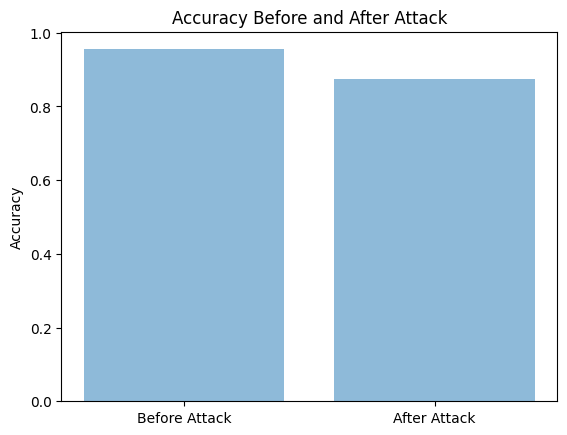

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Accuracy before attack:", accuracy_before_attack)
print("Accuracy after attack:", accuracy_after_attack)

accuracy_data = [accuracy_before_attack, accuracy_after_attack]
labels = ['Before Attack', 'After Attack']
x_pos = np.arange(len(labels))

plt.bar(x_pos, accuracy_data, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Attack')
plt.savefig("figure.png")
plt.show()


In [19]:
test_prediction1 = model.predict(x_test)
print(test_prediction1)

[11  9  9  9 15 11  9  9  9 11  9 11  9 11 11 11 11 11 11 11 11 11 18 11
 11 11 11  9 11 11 11  9 11 11  9  9  9  9 11  9  9 11 11 11  9 11  9 15
 11  9 11 11 17 11 11 11  9  9 11 11  9 11 11 11 11 11 11  9 11 11 11 11
  9  9 11 11 17  9 11  9 11 11  9 11 11 11 11  9  9 11  9  9 11 11 11 11
 11 17  5 11 11 15 11  9 11 11  9 11 11  9 11  5  9 11  9  9 11 11 11 11
 11  9 11 11  9 15 11 11 11 18  9 11 11 17 11 11 11 11 11 11 11 11 17 11
 11 11  9  9 11  9  5 11 11 11 11  9  9  9 11  9 17 11 11  9  9 11  9  9
  9 11 11  9 11 11  9 17 11 11  9 11 11 11  9  9 10  9 11  9 11  9 11 11
 11  9  9 11 11 11 17 11]


In [20]:
test_prediction2 = model.predict(x_test_adv)
print(test_prediction2)

[11  9  9  9 17 11  9  9  9 11  9 11  9 11 11 11 11 11 11 11 11 11 18 11
 11 11 11  9 11 11 11  9 11 11  9  9  9  9 11  9  9 11 11 11 17 11 17 17
 11  9 11 11  9 11 11 11  9  9 11 11  9 11 11 11 11 11 11  9 11 11 11 11
 17 17 11 11 10  9 11  9 11 11  9 11 11 11 11  9 17 11  9  9 11 11 11 11
 11  9 10 11 11 15 11  9 11 11  9 11 11 17 11 10  9 11  9 11 11 11 11 11
 11  9 11 11  9  9 11  9 11 18  9 11 11 17 11 11 11 11 11 11 11 11 15 11
 11 11  9  9 11  9 10 11 11 11 11  9  9  9 11  9 17 11 11  9  9 11  9  9
 17 11 11 17 11 11  9 17 11  0  9 11 11 11  9  9 10  9 11  9 11  9 11 11
 11 17  9 11 11 11  9 11]
